# Lab Assignment 4 -- Data and Pandas
In this lab, you will complete a series of exercises related to the lecture material on data and Pandas using some real datasets. Each exercise will focus around a single dataset and contain multiple steps. 

In [59]:
# We import the libraries you will need
import math
import numpy as np
import pandas as pd

## Exercise 1 -- Unemployment Data
Below, we load in data on Unemployment in the United States at the State level.

In [2]:
# Do Not Edit
url = "https://datascience.quantecon.org/assets/data/state_unemployment.csv"
unemp = pd.read_csv(url, parse_dates=["Date"])

## Exercise 1a -- Displaying Data
Complete the following steps:
- In two cells below, display the top 7 rows  and the bottom 3 rows of `unemp`. 
- In the third cell, change `unemp` so its column names are strictly lowercase
- Display the resulting DataFrame by calling `unemp` at the bottomg of the third cell.

From a "tidy" perspective, what is an observation in this data? Explain why. Answer in the Markdown cell below.

In [3]:
## Exercise 1a -- Top 7
unemp.head(7)

,Date,state,LaborForce,UnemploymentRate
0,2000-01-01,Alabama,2142945.0,4.7
1,2000-01-01,Alaska,319059.0,6.3
2,2000-01-01,Arizona,2499980.0,4.1
3,2000-01-01,Arkansas,1264619.0,4.4
4,2000-01-01,California,16680246.0,5.0
5,2000-01-01,Colorado,2354671.0,2.8
6,2000-01-01,Connecticut,1768421.0,2.8


In [4]:
## Exercise 1a -- Bottom 3
unemp.tail(3)

,Date,state,LaborForce,UnemploymentRate
10797,2017-12-01,West Virginia,781852.0,5.4
10798,2017-12-01,Wisconsin,3158257.0,3.2
10799,2017-12-01,Wyoming,292305.0,4.1


In [5]:
# Exercise 1a -- Rename Columns
names={'Date':'date',
         'state':'state',
         'LaborForce':'laborforce',
         'UnemploymentRate':'unemploymentrate'
        }
unemp=unemp.rename(columns=names)
unemp.head(3)

,date,state,laborforce,unemploymentrate
0,2000-01-01,Alabama,2142945.0,4.7
1,2000-01-01,Alaska,319059.0,6.3
2,2000-01-01,Arizona,2499980.0,4.1


### Response to Exercise 1a

## Exercise 1b -- Creating Variables & Index Setting
Complete the following steps:
- Create a column in `unemp` called "year" that is equal to the year of the date. 
- Change the index of `unemp` so that the index (or indices) reflect the observational units. 
- Display the indices.  

In the Markdown cell below, address the following prompts:
1. How many indices are there?
2. Why are there this many indices? Write an equation that explains it.
3. Is one of your indices a `DateTimeIndex` object?

In [6]:
# Exercise 1b Code
unemp['date']=pd.to_datetime(unemp['date'])
unemp['year']=unemp['date'].dt.year
unemp.set_index(['state','date'],inplace = True)
display(unemp.head(10))
display(unemp.tail(10))

,,laborforce,unemploymentrate,year
state,date,,,
Alabama,2000-01-01,2142945.0,4.7,2000
Alaska,2000-01-01,319059.0,6.3,2000
Arizona,2000-01-01,2499980.0,4.1,2000
Arkansas,2000-01-01,1264619.0,4.4,2000
California,2000-01-01,16680246.0,5.0,2000
Colorado,2000-01-01,2354671.0,2.8,2000
Connecticut,2000-01-01,1768421.0,2.8,2000
Delaware,2000-01-01,405052.0,3.5,2000
Florida,2000-01-01,7766891.0,3.7,2000


,,laborforce,unemploymentrate,year
state,date,,,
South Dakota,2017-12-01,456271.0,3.4,2017
Tennessee,2017-12-01,3218569.0,3.3,2017
Texas,2017-12-01,13591013.0,4.0,2017
Utah,2017-12-01,1573889.0,3.2,2017
Vermont,2017-12-01,344870.0,2.9,2017
Virginia,2017-12-01,4318483.0,3.6,2017
Washington,2017-12-01,3754871.0,4.7,2017
West Virginia,2017-12-01,781852.0,5.4,2017
Wisconsin,2017-12-01,3158257.0,3.2,2017


### Response to Exercise 1b

### Exercise 1c -- Plotting Annual Averages
Complete the following steps:
1. Using `tiny_unemp`, find the year-state average of the unemployment rate and save it to `yearly_state_unemp`.
2. Reshape `yearly_state_unemp` by using `unstack()`. Ensure that your row indices are years and your column variables are states.  
3. Display `yearly_state_unemp` by making it the last line in the cell.
4. Note that the `unemploymentrate` level is not very useful because all of the numbers are unemployment rates. Let's remove it by using `.droplevel()` on `yearly_state_unemp`. Call this new DataFrame `clean_state_unemp` You may want to reference the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.droplevel.html) to see which argument you will need. 
5. Use the `.plot()` method on `clean_state_unemp`.
6. In the next cell, use the `.plot()` method on `yearly_state_unemp`.

In the Markdown cell below **answer the following questions**: 
1. What is the most salient real world phenomenon that is visible in the plot?
2. Compare the two plots. How did removing the `unemploymentrate` level change the plot?

**Hints**
- You can use `df.drop()` ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html))  to get rid of the `laborforce` column when creating `yearly_state_unemp`.

In [7]:
# Do not edit this code
tiny_unemp=unemp.loc[["Colorado", "California", "Alabama", "New York", "Florida"]]
display(tiny_unemp)

laborforce  unemploymentrate  year
state    date                                          
Colorado 2000-01-01   2354671.0               2.8  2000
         2000-02-01   2356780.0               2.8  2000
         2000-03-01   2357991.0               2.7  2000
         2000-04-01   2358321.0               2.7  2000
         2000-05-01   2357978.0               2.7  2000
...                         ...               ...   ...
Florida  2017-08-01  10123142.0               4.0  2017
         2017-09-01  10132775.0               3.9  2017
         2017-10-01  10139339.0               3.9  2017
         2017-11-01  10139552.0               3.9  2017
         2017-12-01  10138193.0               3.9  2017

[1080 rows x 3 columns]

In [21]:
# Exercise 1c -- Steps 1-3
yearly_state_unemp=tiny_unemp.groupby(['year','state'])['unemploymentrate'].mean()
display(yearly_state_unemp)

year  state     
2000  Alabama       4.575000
      California    4.958333
      Colorado      2.758333
      Florida       3.716667
      New York      4.525000
                      ...   
2017  Alabama       4.408333
      California    4.775000
      Colorado      2.808333
      Florida       4.150000
      New York      4.700000
Name: unemploymentrate, Length: 90, dtype: float64

state,Alabama,California,Colorado,Florida,New York
year,,,,,
2000,4.575000,4.958333,2.758333,3.716667,4.525000
2001,5.100000,5.433333,3.816667,4.633333,4.833333
2002,5.900000,6.650000,5.525000,5.641667,6.141667
2003,6.025000,6.800000,5.950000,5.225000,6.391667
2004,5.700000,6.208333,5.475000,4.608333,5.808333
2005,4.500000,5.400000,5.025000,3.683333,5.000000
2006,4.066667,4.916667,4.308333,3.241667,4.558333
2007,3.975000,5.375000,3.725000,4.008333,4.550000
2008,5.716667,7.291667,4.850000,6.300000,5.458333


<AxesSubplot:xlabel='year'>

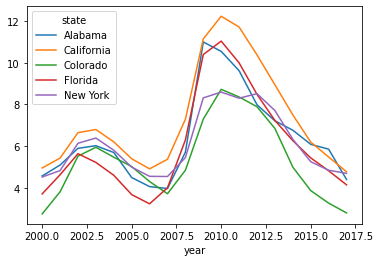

In [24]:
# Exercise 1c -- Steps 4 & 5
clean_state_unemp=yearly_state_unemp.unstack()
display(clean_state_unemp)
clean_state_unemp.plot()

<AxesSubplot:xlabel='year,state'>

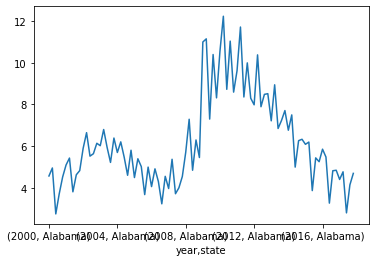

In [23]:
# Exercise 1c -- Step 6
yearly_state_unemp.plot()

#### 1. Unemployment is cyclical
#### 2. It creates more clarity in the plot as .plot will be able to plot the various states accordingly

### Response to Exercise 1c

## Exercise 1d -- Using Lags to Plot Difference
Instead of plotting the unemployment rate average over time, we will plot the annual difference between unemployment rates over time for each state. To do this, complete the following steps:
1. Create a DataFrame called `shifted_unemp` and assign it to `clean_state_unemp` shifted by 1.
2. Create a DataFrame called `change_unemp` and assign it to the the difference between `clean_state_unemp` and `shifted_unemp` divided by `shifted_unemp`.
3. Call `.plot()` on `change_unemp`.

Answer the following questions in the markdown cell below. 
1. Why is the year 2000 no longer being plotted? Look at the `change_unemp` DataFrame if you are unsure.
2. Which state saw the largest annual increase in unemployment during this period?

<AxesSubplot:xlabel='year'>

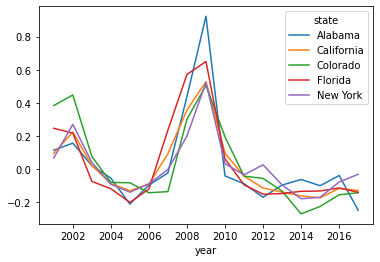

In [30]:
# Exercise 1d code
shifted_unemp=clean_state_unemp.shift(1)
shifted_unemp
change_unemp=((clean_state_unemp-shifted_unemp)/shifted_unemp)
change_unemp
change_unemp.plot()

#### 1. Year 2000 isn't plotted anymore as unemployment rate data starts from that year and is treated as NA. Therefore, in order to find the change in unemployment in 2000, 1999's unemployment rate is required. Hence, it is ultimately omitted.
#### 2. Alabama

### Response to Exercise 1d

## Exercise 2
In this question, we're going to look at data on daily Covid cases in British Columbia from the [COVID-19 Canada Open Data Working Group](https://github.com/ccodwg/Covid19Canada). This data is broken down into five health regions:
- Fraser Health (Fraser)
- Interior Health (Interior)
- Northern Health (Northern)
- Vancouver Coastal Health (Vancouver Coastal)
- Vancouver Island Health Authority (Island)

You can see the geography of these regions below (Image from gov.bc.ca)

<img src = "https://www2.gov.bc.ca/assets/gov/health/managing-your-health/mental-health-substance-use/find-services-map-large.jpg"/>

In [97]:
# Dowlonad the Data -- don't edit this cell
cases_bc = pd.read_csv("/Users/andrewtlim/Downloads/covid_cases_bc.csv")
cases_bc.head()

,date_report,Fraser,Interior,Island,Northern,Vancouver Coastal
0,2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-01-02,25.701861,24.589675,9.101332,33.213897,24.191511
2,2021-01-03,45.464436,9.935222,10.519722,39.252788,26.815675
3,2021-01-04,21.129137,7.203036,6.500952,17.110190,21.813363
4,2021-01-05,0.000000,0.000000,0.000000,0.000000,0.000000


## Exercise 2a -- Checking the Data
`cases_bc` contains daily reported covid cases per hundred thousand people in BC for the year 2021. The data is broken down by health region. Before working with the data, you should learn how its structured and check it for potential errors. Answer the following questions in the first markdown cell below.
1. What is an observation (or row) in the dataset?
2. What is the index? Could we turn one of our variables into an index? Which one?
3. Does it make sense for any of the values in the table to be negative? Why or why not?

Now complete the following steps:
- Make it so the date is our index and check whether it is a `DateTimeIndex`. Afterwards, display `cases_bc` by making it the last line of the cell below. 
- In the second cell, call `.dropna()` on cases_bc. 
- In the third cell, use `.any()` and comparison operators **applied to `cases_bc`** to display all dates on which at least one of the health regions has a negative value. Call this DataFrame `neg_values`. Display `neg_values` by making it the last line of the cell. (**Hint**: Observe what happens when you use a comparison operator on a DataFrame. You can use the output to easily form an index for your DataFrame.)
- If any dates had a negative values, use comparison operators to set all negative values in `cases_bc` to `NaN`.


Answer the following Questions in the second Markdown cell.

4. Did dropping missing value change the DataFrame at all?
5. Did you find any negative values? If so, they have been turned into `NaN` values and will not be used in future analysis. What would be a possible alternative to this approach?


### Response to Exercise 2a Questions 1-3


### Exercise 2a -- Step 1
1. Each row represents the daily covid cases per hundred thousand people across the five health regions
2. Yes, the date_report should be set as the index
3. No there should be no negative values as covid cases does not make any sense when defined as a negative value.

In [98]:
# Exercise 2a -- Step 2
cases_bc.set_index('date_report',inplace=True)
print(cases_bc.dtypes)
cases_bc

Fraser               float64
Interior             float64
Island               float64
Northern             float64
Vancouver Coastal    float64
dtype: object


,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-02,25.701861,24.589675,9.101332,33.213897,24.191511
2021-01-03,45.464436,9.935222,10.519722,39.252788,26.815675
2021-01-04,21.129137,7.203036,6.500952,17.110190,21.813363
2021-01-05,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2021-12-27,42.153154,36.387752,24.585417,17.781177,28.865804
2021-12-28,41.995474,33.282995,33.686749,13.755250,32.966060
2021-12-29,83.623027,46.447164,36.523528,33.213897,46.824926


In [99]:
# Exercise 2a -- Step 3
cases_bc.dropna()
negative_values=cases_bc<0
dates_with_negatives=negative_values.any(axis=1)
neg_values=cases_bc[dates_with_negatives]
cases_bc=cases_bc.where(cases_bc >= 0, np.nan)
print(neg_values)

               Fraser  Interior    Island  Northern  Vancouver Coastal
date_report                                                           
2021-06-07   0.525600  1.614474  0.236398 -0.670988          -1.312082
2021-06-23   1.576801  5.091801  0.354597 -1.006482           1.066067
2021-06-28   3.574083  2.235425 -0.590996  0.000000           3.936246
2021-06-30   0.893521  1.738664  0.118199 -0.335494           0.984061


### Exercise 2a -- Step 4
1. No, dropping missing values did not change the DataFrame. Hence, suggesting that there were no missing values
2. Yes, I found some and they were converted to Nan. A possible approach would be to consider the values as errorneous data and to remove the negative sign from each of the negative value.

### Response to Exercise 2a 4-5

## Exercise 2b -- Aggregations
Using aggregators with the axis argument, complete the following steps:
1. At each date, find the minimum number of cases per 100,000 across health regions. Print the top 3 rows of the resulting series.
2. For each health region, what was the median number of daily cases per 100,000 in 2021. Print the resulting series. (**Hint:** Think about how long should this series be.)
3. What is the maximum number of daily cases per 100,000 across all health regions? Which health region did this maximum occur in? What day was the maximum attained?

**Hint:** For the last step, you might need to aggregate twice. You may also want to use the aggregator `.idxmax()` which returns the index of the maximum value. 

In [163]:
# Exercise 2b -- Step 1
min_per_date=cases_bc.min(axis=1)
print(min_per_date.head(3))

date_report
2021-01-01    0.000000
2021-01-02    9.101332
2021-01-03    9.935222
dtype: float64


In [164]:
# Exercise 2b -- Step 2
median_per_region=cases_bc.median()
print(median_per_region)

Fraser               8.567287
Interior             6.582085
Island               2.482181
Northern             8.219601
Vancouver Coastal    5.576348
dtype: float64


In [165]:
max_daily = cases_bc.max(axis=1)
max_across_regions = max_daily.max()
region_max=cases_bc.max().idxmax()
date_max=cases_bc[region_max].idxmax()

print(f'There were a maximum of {max_across_regions:.3f} daily cases per 100,000 across all regions. This maximum occured in {region_max} on {date_max}')

There were a maximum of 136.211 daily cases per 100,000 across all regions. This maximum occured in Northern on 2021-10-18


## Exercise 2c -- Classifying Variance
Averages and medians communicate some notion of the statistical center of data. Similarly, the sample variance of data gives us some sense of how dispersed the data is around that center. A low variance means the data is relatively concentrated whereas a high variance means the data is relatively dispersed. The sample variance of a column of data $x$ can be given by the following equation
$$
var(x) = \frac{1}{n-1} \sum_{i=1}^{n} \left(x_i - \bar{x}\right)^2
$$
where $n$ is the number of elements in $x$, $\bar{x}$ is the average of $x$, and $x_i$ is a single element in $x$. Complete the following steps:
1.  The method DataFrame and Series method `.var()` will automatically calculate the variance of each column or row in a DataFrame. Use `.var()` to calculate the variance in the daily cases per 100,000 for each health region in 2021. Name this DataFrame `hr_var`.
2. Currently,  `hr_var` has a single column indexed by the integer 0. Rename this column so it is called "s_var".
3. Using a list comprehension, create a new column in `hr_var` called "classification" which is equal to
    - "High" if the variance for a health region is strictly greater than 300,  
    - "Medium" if the variance for a health region is strictly greater than 150 and less than or equal to 300
    - "Low" if the variance for a health region is less than or equal to 150. 
    
4. Display the resulting DataFrame by having `hr_var` as your last line in the cell. 
5. In the second cell, use `cases_bc`, indexing, and `.plot()` to plot the daily cases per 100,000 for the Northern and Island health regions.

Finally, in the Markdown cell below **answer the following question**. What are the classifications for the Northern and Island regions. What features of the two lines you plotted reflect these classifications? 


**Hint:** For step 3, you will want to use a nested if else statements within the list comprehension. 

In [166]:
# Exercise 2c -- Steps 1-4
hr_var=cases_bc.var().to_frame()
hr_var.columns=['s_var']
hr_var['classification']=np.where(hr_var['s_var']>300,'high',
                                 np.where(hr_var['s_var']>150,'medium','low'))
hr_var

,s_var,classification
Fraser,325.974643,high
Interior,248.630355,medium
Island,70.464125,low
Northern,492.035072,high
Vancouver Coastal,193.452989,medium


<AxesSubplot:xlabel='date_report'>

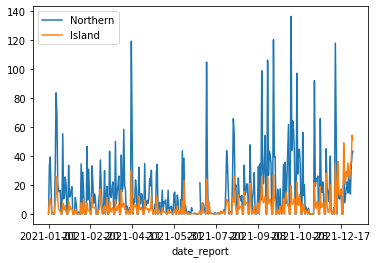

In [167]:
# Exercise 2c -- Step 5
cases_bc[['Northern','Island']].plot()

### Response to Exercise 2c 

## Exerice 2d -- More Classifying & `.applymap()`
Now, we want to determine whether the cases per 100,000 on a given day was "High" ($> 10$), "Low"($\leq 10$ and $>0$), or "None" ($=0$) for each region-day. To do this, complete the following steps:
1. Define a function called `classify_cases` that takes a **single number** and returns a "High", "Low" or "None" according to the criteria above
2. `.applymap()` takes a function of a single value and applies that function to each cell in a DataFrame  individuall. Using `classify_cases` and `.applymap`, create a DataFrame that has a classification for each region-day. Call this DataFrame `cases_bins`. 
3. Print the top 5 rows of that DataFratme. 

In [168]:
# Exercise 2d code
def classify_cases (n):
    if n >10:
        return 'High'
    elif 0<n<=10:
        return 'Low'
    elif n==0:
        return 'None'
cases_bins=cases_bc.applymap(classify_cases)
cases_bins.head(5)

,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-01,None,None,None,None,None
2021-01-02,High,High,Low,High,High
2021-01-03,High,Low,High,High,High
2021-01-04,High,Low,Low,High,High
2021-01-05,None,None,None,None,None


### Exercise 2e -- Classification Count
Next, we want to count how many days of each type ("High", "Low", and "None") each helth region had on 2021. Complete the following steps:
1. Using `pd.value_counts` and `.apply()`, create DataFrame called `class_counts` where the row indices are the three classes and the columns are health regions.
2. Using the DataFrame method `.barh()`, create a horizontal bar plot where there are five groups of three bars. 

**Hint:** You may have to use `.T` to get the right bar chart. 

<AxesSubplot:>

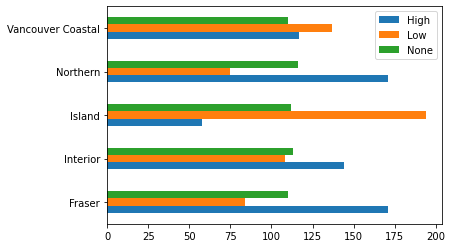

In [169]:
# Exercise 2e code
class_counts=cases_bins.apply(pd.value_counts)
class_counts_transformed=class_counts.T
class_counts_transformed.plot(kind='barh')

### Exercise 2f -- Choose Your Health Region
Choose one of the five health regions. Complete the following steps to find the average number of cases per 100,000 when case loads are "High" and when case loads are "Low".
1. Using `pd.concat()` `cases_bc`, and `cases_bin`, create a DataFrame with two columns called `my_health_region`. The first column should be titled "cases" and include the number of cases per 100,000 in your chosen health region for each day. The second column should be titled "class" and include the classification for that health region in each day.
2. Using `.groupby()` and an aggregator, find the average number of cases per 100,000 when case loads are "High" and when case loads are "Low".

In [176]:
# Exercise 2f code
print(cases_bc)
print(cases_bins)

region = 'Island'

my_health_region = pd.concat([cases_bc[[region]].rename(columns={region:'cases'}),
                              cases_bins[[region]].rename(columns={region:'class'})],axis=1)
print(my_health_region)
average_cases_by_class = my_health_region.groupby('class').mean()
print(average_cases_by_class)

                 Fraser   Interior     Island   Northern  Vancouver Coastal
date_report                                                                
2021-01-01     0.000000   0.000000   0.000000   0.000000           0.000000
2021-01-02    25.701861  24.589675   9.101332  33.213897          24.191511
2021-01-03    45.464436   9.935222  10.519722  39.252788          26.815675
2021-01-04    21.129137   7.203036   6.500952  17.110190          21.813363
2021-01-05     0.000000   0.000000   0.000000   0.000000           0.000000
...                 ...        ...        ...        ...                ...
2021-12-27    42.153154  36.387752  24.585417  17.781177          28.865804
2021-12-28    41.995474  33.282995  33.686749  13.755250          32.966060
2021-12-29    83.623027  46.447164  36.523528  33.213897          46.824926
2021-12-30   121.886737  62.219330  54.371594  40.930258          80.119006
2021-12-31   102.176722  39.740889  51.298417  43.278715          79.134944

[365 rows x